In [1]:
# Importing all neccessary libraries
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plot
import seaborn as snsg 
%matplotlib inline
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

In [2]:
movies = pd.read_csv('movieandrating.csv')

In [3]:
movies.head

<bound method NDFrame.head of         userid  movieid  rating                                         movie  \
0          429      595     5.0                          Beauty and the Beast   
1          429      588     5.0                                       Aladdin   
2          429      590     5.0                            Dances with Wolves   
3          429      592     5.0                                        Batman   
4          429      432     3.0  City Slickers II: The Legend of Curly's Gold   
...        ...      ...     ...                                           ...   
100831     514   187031     2.5                Jurassic World: Fallen Kingdom   
100832     514   187595     3.0                       Solo: A Star Wars Story   
100833     514     5247     2.5                         Smokey and the Bandit   
100834     514     5246     1.5                      Smokey and the Bandit II   
100835     514      162     4.0                                         Crumb  

&nbsp;Finding similar users using the ratings dataset(Interaction Matrix)

In [4]:
# import dataset

ratings = pd.read_csv('ratings.csv')

df_movies = pd.read_csv('movies.csv')

In [5]:
# observe the head of the dataset

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# remove the variable timestamp from the dataset

ratings = ratings.drop(['timestamp'], axis=1)

In [7]:
# see the shape of the dataset

ratings.shape

(100836, 3)

In [8]:
# total number of unique users

ratings['userId'].nunique()

610

In [9]:
# total number of unique movies

ratings['movieId'].nunique()

9724

In [10]:
# which user has rated the most

ratings['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
320      20
569      20
442      20
257      20
406      20
Name: userId, Length: 610, dtype: int64

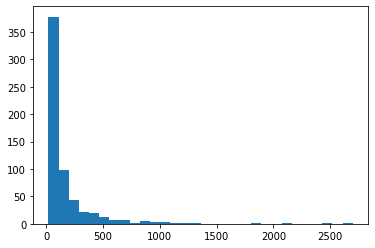

In [11]:
# create a histogram of all the interactions by all the users present in the dataset

interactions = ratings.groupby('userId').count()['movieId']
plt.hist(interactions, bins=30)
plt.show()

In [12]:
# create the user item matrix using the ratings dataset 

interactions_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

In [13]:
# check the shape of the matrix

interactions_matrix.shape

(610, 9724)

In [14]:
# check head of the matrix and see how it looks like

interactions_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# replace all the missing values with zero

interactions_matrix = interactions_matrix.fillna(0)

In [16]:
# import cosine_similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

def similar_users(user_id, interactions_matrix):
    
    # compute similarity of each user to the provided user
    similarity = []
    for user in range (1, interactions_matrix.shape[0]+1):
        sim = cosine_similarity([interactions_matrix.loc[user_id]], [interactions_matrix.loc[user]])
        similarity.append((user, sim))
    
    # sort by similarity
    similarity.sort(key=lambda x:x[1], reverse=True)
    
    # create list of just the user ids
    most_similar_users = [tup[0] for tup in similarity]
    
    # create list of similarity score
    similarity_score = [tup[1] for tup in similarity]
    
    # remove the user's own id
    most_similar_users.remove(user_id)
    
    # remove the user's own similarity score
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [17]:
# check the implemented function above
#User with one of the movie counts

similar_users(564, interactions_matrix)[0][:5]

[111, 365, 73, 491, 249]

In [18]:
similar_users(564, interactions_matrix)[1][:5]

[array([[0.3316382]]),
 array([[0.32126016]]),
 array([[0.26688978]]),
 array([[0.26195164]]),
 array([[0.24184317]])]

In [19]:
# check the implemented function above(similar movies)
#Popular movie with high ratings(Beauty and the beast)

similar_users(595, interactions_matrix)[0][:5]

[268, 96, 593, 591, 566]

In [20]:
similar_users(595, interactions_matrix)[1][:5]

[array([[0.16527408]]),
 array([[0.14670535]]),
 array([[0.14137672]]),
 array([[0.14135724]]),
 array([[0.13527155]])]

Plotting a Network Graph between user 564 and its similar users[111, 365, 73, 491, 249].

In [21]:
#Dataset used was the combined movies and ratings data  in the previous section showed above.above
df_user564 = movies[movies['userid']==564]
df_user111= movies[movies['userid']==111]
df_user365 = movies[movies['userid']==365]
df_user73 = movies[movies['userid']==73]
df_user491 = movies[movies['userid']==491]
df_user249 = movies[movies['userid']==249]
df_usersim564= pd.concat([df_user564,df_user111,df_user365,df_user73,df_user491,df_user249])
df_usersim564.head()


,userid,movieid,rating,movie,genre,releaseyear
85437,564,6188,4.5,Old School,Comedy,2003.0
85438,564,6936,3.5,Elf,Children|Comedy|Fantasy,2003.0
85439,564,46976,2.5,Stranger than Fiction,Comedy|Drama|Fantasy|Romance,2006.0
85440,564,34162,4.0,Wedding Crashers,Comedy|Romance,2005.0
85441,564,60756,5.0,Step Brothers,Comedy,2008.0


In [22]:
df_usersim564.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 85437 to 100818
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userid       2400 non-null   int64  
 1   movieid      2400 non-null   int64  
 2   rating       2400 non-null   float64
 3   movie        2400 non-null   object 
 4   genre        2400 non-null   object 
 5   releaseyear  2398 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 131.2+ KB


In [23]:
df_usersim564.to_csv("df_usersim564.csv", index=False, header=False)
#https://poloclub.github.io/argo-graph-lite/ - Tool used for plotting graph

![Picture title](image-20220721-134928.png)

In [24]:
# check the implemented function above
#User similarity between users with low rating counts

similar_users(406, interactions_matrix)[0][:3]

[12, 484, 605]

In [25]:
similar_users(406, interactions_matrix)[1][:3]

[array([[0.15947283]]), array([[0.11060895]]), array([[0.10194172]])]

Plotting a Network Graph between user 406 and its similar users[12, 484, 605].

In [26]:
#Dataset used was the combined movies and ratings data  in the previous section showed above.above
df_user406 = movies[movies['userid']==406]
df_user12 = movies[movies['userid']==12]
df_user484 = movies[movies['userid']==484]
df_user605 = movies[movies['userid']==605]
df_usersim406= pd.concat([df_user12,df_user484,df_user605])
df_usersim406.head()


,userid,movieid,rating,movie,genre,releaseyear
59609,12,543,3.5,So I Married an Axe Murderer,Comedy|Romance|Thriller,1993.0
59610,12,1876,3.5,Deep Impact,Drama|Sci-Fi|Thriller,1998.0
59611,12,2100,3.5,Splash,Comedy|Fantasy|Romance,1984.0
59612,12,261,4.5,Little Women,Drama,1994.0
59613,12,277,3.0,Miracle on 34th Street,Drama,1994.0


In [27]:
df_usersim406.to_csv("df_usersim406.csv", index=False, header=False)

The graph below shows the similarities between users with low rating counts and the genres they rated.

![Picture title](image-20220721-143132.png)

Plotting a Network Graph between movie 595 and its similar movies[[268, 96, 593, 591, 566]].

In [28]:
df_movies595 = movies[movies['movieid']==595]
df_movies268 = movies[movies['movieid']==268]
df_movies96 = movies[movies['movieid']==96]
df_movies593 = movies[movies['movieid']==593]
df_movies591 = movies[movies['movieid']==591]
df_movies566 = movies[movies['movieid']==566]
df_moviesim= pd.concat([df_movies595,df_movies268,df_movies96, df_movies593, df_movies591, df_movies566])
df_moviesim.tail()


,userid,movieid,rating,movie,genre,releaseyear
99118,362,593,5.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
99306,98,593,4.5,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
99452,514,593,5.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
100128,596,593,4.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
100653,331,593,5.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0


In [29]:
df_moviesim.to_csv("df_moviesim.csv", index=False, header=True)

![Picture title](image-20220722-000112.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27bcd221-b64d-46f2-83dc-8fb199a7eed4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>